In [1]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

final_env


In [2]:
import pandas as pd
import numpy as np
import wbgapi as wb

# 1.Setting up the data

In [3]:
df_country = pd.read_csv('CountrUsedN(1).csv')

country_name_list = df_country['country'].tolist()

country_list = list(wb.economy.coder(country_name_list).values())
country_set = set(country_list)
 
# years of interest
year_list = range(1994, 2022)

# measures of interest
wb_measures_list = df_country['Index'].tolist()

# import the data from the API
raw_dat = wb.data.DataFrame(wb_measures_list, country_set, year_list)

raw_dat = raw_dat.reset_index()


In [4]:
raw_dat['series'] = raw_dat['series']+'_'+ raw_dat['economy']
raw_dat_t = raw_dat.drop(['economy'],axis=1).T

raw_dat_t.columns = list(raw_dat_t.iloc[0,:])

raw_dat_t = raw_dat_t.iloc[1:,:]

In [5]:
raw_dat_t.head()

,EN.ATM.CO2E.KT_ARG,NY.GDP.MKTP.PP.KD_ARG,SP.POP.TOTL_ARG,EN.ATM.CO2E.KT_ARM,NY.GDP.MKTP.PP.KD_ARM,SP.POP.TOTL_ARM,EN.ATM.CO2E.KT_AUS,NY.GDP.MKTP.PP.KD_AUS,SP.POP.TOTL_AUS,EN.ATM.CO2E.KT_AUT,...,SP.POP.TOTL_TUR,EN.ATM.CO2E.KT_UKR,NY.GDP.MKTP.PP.KD_UKR,SP.POP.TOTL_UKR,EN.ATM.CO2E.KT_USA,NY.GDP.MKTP.PP.KD_USA,SP.POP.TOTL_USA,EN.ATM.CO2E.KT_ZAF,NY.GDP.MKTP.PP.KD_ZAF,SP.POP.TOTL_ZAF
YR1994,111910.0,622413803601.144043,34402669.0,2740.0,9053822833.63031,3283664.0,280180.0,572663891212.334961,17855000.0,58280.0,...,57564209.0,415670.0,463906028296.177002,51921400.0,5066810.0,11161399723961.699219,263126000.0,252140.0,419376463045.297974,40564061.0
YR1995,112890.0,604704826243.564941,34828168.0,3510.0,9678536466.07655,3217349.0,290180.0,594618854646.105957,18072000.0,61180.0,...,58486453.0,399250.0,407309492840.617981,51512800.0,5117040.0,11460995943158.0,266278000.0,264310.0,432377133401.984009,41435761.0
YR1996,122550.0,638124986359.866943,35246376.0,2580.0,10246221416.492201,3168213.0,300810.0,617537962482.368042,18311000.0,64900.0,...,59423278.0,346110.0,366578543556.55603,51057800.0,5273490.0,11893369521975.900391,269394000.0,274110.0,450969350126.45697,42241007.0
YR1997,126120.0,689883602459.331055,35657438.0,3340.0,10586506596.0205,3133081.0,307850.0,641673142433.359985,18517000.0,64220.0,...,60372571.0,328240.0,355581187255.638,50594600.0,5543350.0,12422288471502.599609,272657000.0,289030.0,462694553236.343994,42987456.0
YR1998,132670.0,716445355021.615967,36063451.0,3470.0,11359321576.228901,3108691.0,328620.0,671280015502.869995,18711000.0,64670.0,...,61329665.0,309290.0,348825144690.164978,50144500.0,5590540.0,12978980215336.0,275854000.0,296490.0,465008026004.106018,43682259.0


# 2. Missing value inputation
## a. Removing the columns with more than 25 null values
## b. Filling nan with knn inputation technique

In [6]:
nan_sum = raw_dat_t.isna().sum()
raw_dat_t.dropna(thresh=len(raw_dat_t) - 3, axis=1,inplace=True)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
raw_dat_inputed = pd.DataFrame(imputer.fit_transform(raw_dat_t))

raw_dat_inputed.columns = raw_dat_t.columns

# 3. Creating reponse CO2 per capita by dividing CO2 emission by total population

In [7]:
response = pd.DataFrame(raw_dat_inputed.filter(regex='EN.ATM.CO2E.KT').values/raw_dat_inputed.filter(regex='SP.POP.TOTL').values)

In [8]:
response.columns = ['CO2_per_capita' +'_'+i.split('_')[1] for i in raw_dat_inputed.filter(regex='EN.ATM.CO2E.KT').columns]

In [9]:
final_data = pd.concat([raw_dat_inputed,response],axis=1)

In [10]:
final_data.head()

,EN.ATM.CO2E.KT_ARG,NY.GDP.MKTP.PP.KD_ARG,SP.POP.TOTL_ARG,EN.ATM.CO2E.KT_ARM,NY.GDP.MKTP.PP.KD_ARM,SP.POP.TOTL_ARM,EN.ATM.CO2E.KT_AUS,NY.GDP.MKTP.PP.KD_AUS,SP.POP.TOTL_AUS,EN.ATM.CO2E.KT_AUT,...,CO2_per_capita_RUS,CO2_per_capita_SGP,CO2_per_capita_SRB,CO2_per_capita_SVK,CO2_per_capita_SVN,CO2_per_capita_SWE,CO2_per_capita_TUR,CO2_per_capita_UKR,CO2_per_capita_USA,CO2_per_capita_ZAF
0,111910.0,6.224138e+11,34402669.0,2740.0,9.053823e+09,3283664.0,280180.0,5.726639e+11,17855000.0,58280.0,...,0.011354,0.011108,0.005029,0.007800,0.006841,0.006661,0.002672,0.008006,0.019256,0.006216
1,112890.0,6.047048e+11,34828168.0,3510.0,9.678536e+09,3217349.0,290180.0,5.946189e+11,18072000.0,61180.0,...,0.011023,0.010662,0.005842,0.007902,0.007272,0.006597,0.002875,0.007751,0.019217,0.006379
2,122550.0,6.381250e+11,35246376.0,2580.0,1.024622e+10,3168213.0,300810.0,6.175380e+11,18311000.0,64900.0,...,0.010807,0.010494,0.006780,0.007848,0.007689,0.007199,0.003119,0.006779,0.019575,0.006489
3,126120.0,6.898836e+11,35657438.0,3340.0,1.058651e+10,3133081.0,307850.0,6.416731e+11,18517000.0,64220.0,...,0.010070,0.010053,0.007413,0.007852,0.007921,0.006487,0.003204,0.006488,0.020331,0.006724
4,132670.0,7.164454e+11,36063451.0,3470.0,1.135932e+10,3108691.0,328620.0,6.712800e+11,18711000.0,64670.0,...,0.010076,0.009434,0.007428,0.007680,0.007822,0.006594,0.003158,0.006168,0.020266,0.006787


# 4. Functional Data Analysis

In [11]:
raw_dat_t.shape

(28, 168)

In [12]:
final_data.shape

(28, 224)

In [13]:
final_data.index = raw_dat_t.index

In [14]:
final_data.head()

,EN.ATM.CO2E.KT_ARG,NY.GDP.MKTP.PP.KD_ARG,SP.POP.TOTL_ARG,EN.ATM.CO2E.KT_ARM,NY.GDP.MKTP.PP.KD_ARM,SP.POP.TOTL_ARM,EN.ATM.CO2E.KT_AUS,NY.GDP.MKTP.PP.KD_AUS,SP.POP.TOTL_AUS,EN.ATM.CO2E.KT_AUT,...,CO2_per_capita_RUS,CO2_per_capita_SGP,CO2_per_capita_SRB,CO2_per_capita_SVK,CO2_per_capita_SVN,CO2_per_capita_SWE,CO2_per_capita_TUR,CO2_per_capita_UKR,CO2_per_capita_USA,CO2_per_capita_ZAF
YR1994,111910.0,6.224138e+11,34402669.0,2740.0,9.053823e+09,3283664.0,280180.0,5.726639e+11,17855000.0,58280.0,...,0.011354,0.011108,0.005029,0.007800,0.006841,0.006661,0.002672,0.008006,0.019256,0.006216
YR1995,112890.0,6.047048e+11,34828168.0,3510.0,9.678536e+09,3217349.0,290180.0,5.946189e+11,18072000.0,61180.0,...,0.011023,0.010662,0.005842,0.007902,0.007272,0.006597,0.002875,0.007751,0.019217,0.006379
YR1996,122550.0,6.381250e+11,35246376.0,2580.0,1.024622e+10,3168213.0,300810.0,6.175380e+11,18311000.0,64900.0,...,0.010807,0.010494,0.006780,0.007848,0.007689,0.007199,0.003119,0.006779,0.019575,0.006489
YR1997,126120.0,6.898836e+11,35657438.0,3340.0,1.058651e+10,3133081.0,307850.0,6.416731e+11,18517000.0,64220.0,...,0.010070,0.010053,0.007413,0.007852,0.007921,0.006487,0.003204,0.006488,0.020331,0.006724
YR1998,132670.0,7.164454e+11,36063451.0,3470.0,1.135932e+10,3108691.0,328620.0,6.712800e+11,18711000.0,64670.0,...,0.010076,0.009434,0.007428,0.007680,0.007822,0.006594,0.003158,0.006168,0.020266,0.006787


In [15]:
import skfda

In [16]:
import matplotlib.pyplot as plt

In [17]:
final_data = final_data.T.reset_index()

In [18]:
final_data.head()

,index,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,YR2001,YR2002,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,EN.ATM.CO2E.KT_ARG,1.119100e+05,1.128900e+05,1.225500e+05,1.261200e+05,1.326700e+05,1.345100e+05,1.322700e+05,1.252600e+05,1.174700e+05,...,1.779600e+05,1.832500e+05,1.796000e+05,1.855500e+05,1.831600e+05,1.793200e+05,1.769000e+05,1.681000e+05,1.725000e+05,1.725000e+05
1,NY.GDP.MKTP.PP.KD_ARG,6.224138e+11,6.047048e+11,6.381250e+11,6.898836e+11,7.164454e+11,6.921904e+11,6.867290e+11,6.564522e+11,5.849352e+11,...,1.006559e+12,1.030770e+12,1.004871e+12,1.032316e+12,1.010840e+12,1.039331e+12,1.012127e+12,9.916222e+11,8.934985e+11,9.852050e+11
2,SP.POP.TOTL_ARG,3.440267e+07,3.482817e+07,3.524638e+07,3.565744e+07,3.606345e+07,3.646722e+07,3.687080e+07,3.727564e+07,3.768174e+07,...,4.173327e+07,4.220294e+07,4.266950e+07,4.313197e+07,4.359037e+07,4.404481e+07,4.449450e+07,4.493871e+07,4.537676e+07,4.580875e+07
3,EN.ATM.CO2E.KT_ARM,2.740000e+03,3.510000e+03,2.580000e+03,3.340000e+03,3.470000e+03,3.110000e+03,3.560000e+03,3.600000e+03,3.120000e+03,...,5.720000e+03,5.500000e+03,5.480000e+03,5.340000e+03,5.070000e+03,5.370000e+03,5.710000e+03,6.170000e+03,5.940000e+03,5.940000e+03
4,NY.GDP.MKTP.PP.KD_ARM,9.053823e+09,9.678536e+09,1.024622e+10,1.058651e+10,1.135932e+10,1.173418e+10,1.242650e+10,1.361944e+10,1.541721e+10,...,2.998932e+10,3.097897e+10,3.209421e+10,3.312123e+10,3.318747e+10,3.567653e+10,3.753171e+10,4.038412e+10,3.739569e+10,3.952725e+10


In [19]:
data_matrix = final_data[final_data['index'].str.contains('EN.ATM.CO2E.KT')].iloc[:,1:].values

In [20]:
grid_points=list(range(1994,2022,1))

In [21]:
fd = skfda.FDataGrid(
    data_matrix=data_matrix.tolist(),
    grid_points=grid_points,
)

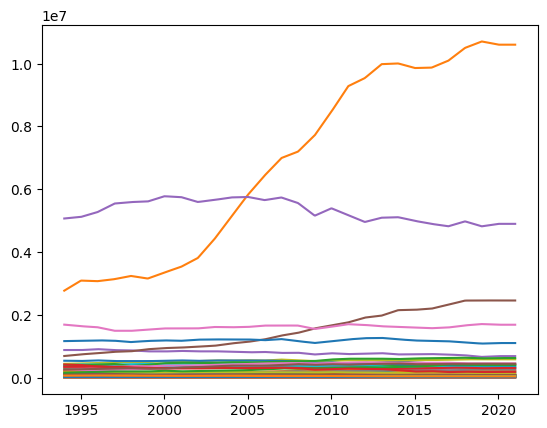

In [22]:
fd.plot()
plt.show()

## In above graph, it is difficult to differentiate between the lines, so therefore we can use np.log to make it more visible to user

0.8406826459974687


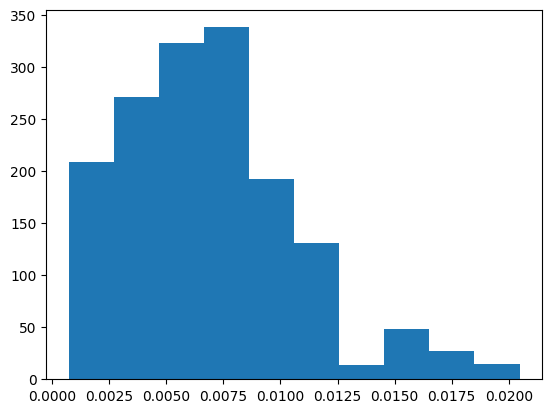

In [23]:
# investigate the skewness of the reponce
tot_pop = final_data[final_data['index'].str.contains('SP.POP.TOTL')].iloc[:,1:].values
co2 = final_data[final_data['index'].str.contains('EN.ATM.CO2E.KT')].iloc[:,1:].values
from scipy.stats import skew
CO2perCapita = co2/tot_pop
dummy=CO2perCapita.flatten()
print(skew(dummy))
plt.hist(dummy)
plt.show()

## Above graphs represents, reponse which is CO2percapita is rightly skewed

In [24]:
logCO2perCap = np.log(CO2perCapita) 
logCO2perCap_list = logCO2perCap.tolist()

grid_points=list(range(1994,2022,1))

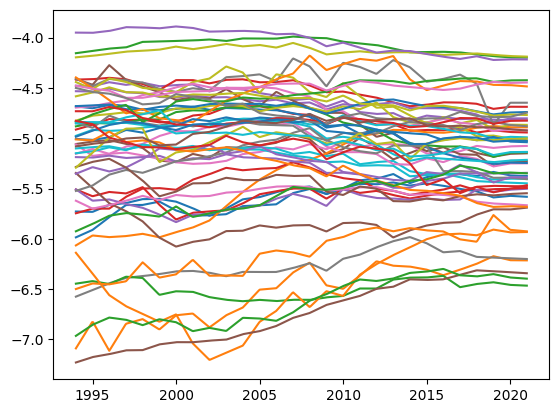

In [25]:
fd = skfda.FDataGrid(
    data_matrix=logCO2perCap_list,
    grid_points=grid_points,
)
fd.plot()
plt.show()

## By using log, the graph looks visible

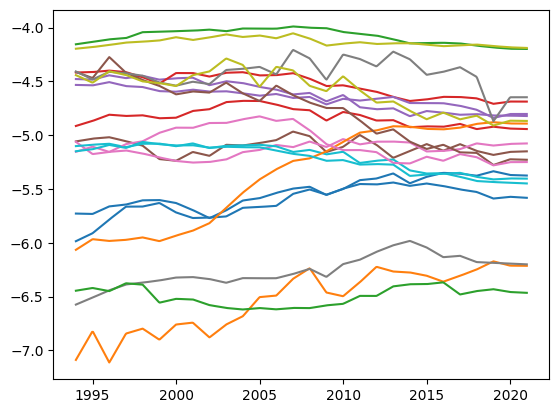

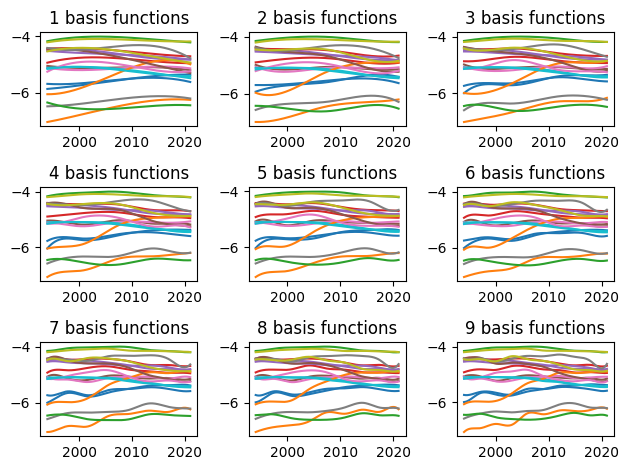

In [26]:
max_basis = 9

# Select only the first 5 samples
fd1 = fd[:20]
fd1.plot()

fig, axes = plt.subplots(nrows=3, ncols=3)

for n_basis in range(1, max_basis + 1):
#     print (n_basis)
    basis = skfda.representation.basis.BSplineBasis(n_basis=n_basis+3)
    X_basis = fd1.to_basis(basis)

    ax = axes.ravel()[n_basis - 1]
    fig = X_basis.plot(axes=ax)
    ax.set_title(f"{n_basis} basis functions")

fig.tight_layout()
plt.show()

## As the number of basis function increases the overfitting risk, because the fit gets too much aligned with the data points

In [27]:
# basis = skfda.representation.basis.BSplineBasis(n_basis=7)
# X_basis = fd.to_basis(basis)
# new_fd = X_basis.to_grid()

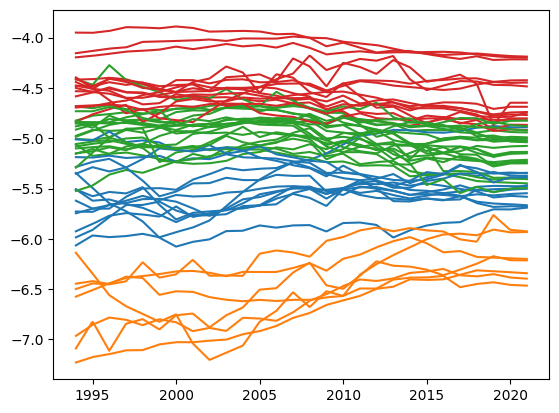

In [28]:
clusterer = skfda.ml.clustering.KMeans(n_clusters=4)
y_pred = clusterer.fit_predict(fd)

fd.plot(group=y_pred)
plt.show()

C:\Users\Upmanyu\AppData\Local\Continuum\anaconda3\envs\final_env\lib\site-packages\skfda\representation\grid.py:788: RuntimeWarning: invalid value encountered in divide
  return self._copy_op(other, data_matrix=self.data_matrix / data_matrix)


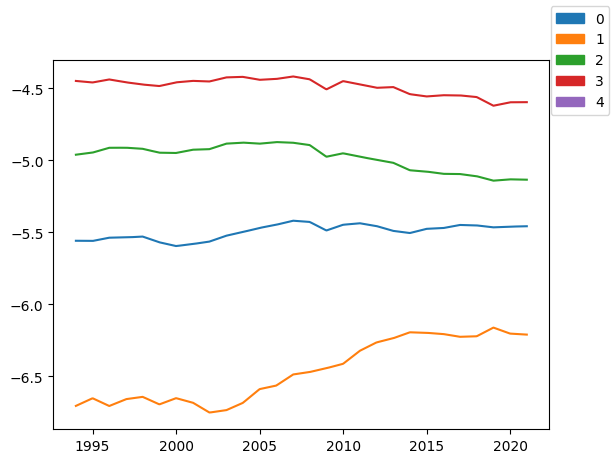

In [29]:
mean0 = skfda.exploratory.stats.mean(fd[y_pred==0])
mean1 = skfda.exploratory.stats.mean(fd[y_pred==1])
mean2 = skfda.exploratory.stats.mean(fd[y_pred==2])
mean3 = skfda.exploratory.stats.mean(fd[y_pred==3])
mean4 = skfda.exploratory.stats.mean(fd[y_pred==4])
# mean5 = skfda.exploratory.stats.mean(fd[y_pred==5])
means = mean0.concatenate(mean1,mean2,mean3,mean4)
means.plot(
    group=['0', '1','2','3','4'],
    linewidth=1.5,
    legend=True,
)
plt.show()

In [30]:
ClusRes=pd.DataFrame()
ClusRes['economy']=country_list
ClusRes['cluster_label']=y_pred

In [31]:
ClusRes['cluster_label'].value_counts()

2    21
3    15
0    13
1     7
Name: cluster_label, dtype: int64

In [32]:
covariate = pd.DataFrame(final_data[(final_data['index'].str.contains('NY.GDP.MKTP.PP.KD'))][[i for i in final_data.columns if 'YR' in i]].values/final_data[(final_data['index'].str.contains('SP.POP.TOTL'))][[i for i in final_data.columns if 'YR' in i]].values)
response = final_data[(final_data['index'].str.contains('CO2_per_capita'))]

In [38]:
final_data['economy'] = final_data['index'].apply(lambda x: x.split('_')[1])
final_data['index'] = final_data['index'].apply(lambda x: x.split('_')[0])

In [39]:
covariate.columns = ['YR'+str(i) for i in range(1994,2022,1)]
covariate['economy'] = final_data[(final_data['index'].str.contains('NY.GDP.MKTP.PP.KD'))]['economy'].tolist()
covariate['index'] = final_data[(final_data['index'].str.contains('NY.GDP.MKTP.PP.KD'))]['economy'].tolist()

In [40]:
response['cluster_label'] = y_pred

C:\Users\Upmanyu\AppData\Local\Temp\ipykernel_6320\3400816811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response['cluster_label'] = y_pred


In [41]:
covariate['cluster_label'] = y_pred

In [42]:
# covariate

In [43]:
non_scaled_gdp = covariate.groupby(['cluster_label'])[['YR'+str(i) for i in range(1994,2022,1)]].mean()

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_gdp = scaler.fit_transform(non_scaled_gdp.values)
scaled_gdp

array([[-0.50150873, -0.50948767, -0.49905089, -0.48513467, -0.4699048 ,
        -0.48546924, -0.48527037, -0.48113459, -0.47643759, -0.46020151,
        -0.4446938 , -0.4297673 , -0.41573739, -0.41404792, -0.4121837 ,
        -0.44894206, -0.44899148, -0.4412539 , -0.44956737, -0.44128998,
        -0.43722593, -0.42254505, -0.41188759, -0.3958477 , -0.3880082 ,
        -0.38082533, -0.35303326, -0.33911545],
       [-1.37724591, -1.36823269, -1.37447948, -1.38087174, -1.39327278,
        -1.37929003, -1.37587789, -1.37955446, -1.37920782, -1.38546171,
        -1.39183481, -1.39623023, -1.40206769, -1.39960577, -1.40522125,
        -1.38519482, -1.37350656, -1.36931112, -1.35680314, -1.35607787,
        -1.35214208, -1.35046317, -1.35891402, -1.36123407, -1.36250371,
        -1.36588665, -1.37192886, -1.36748123],
       [ 0.73102284,  0.70924664,  0.70579296,  0.69129303,  0.7054637 ,
         0.68417099,  0.66643752,  0.6712527 ,  0.65479973,  0.63519118,
         0.61941265,  0.5977

In [45]:
non_scaled_co2 = response.groupby(['cluster_label'])[['YR'+str(i) for i in range(1994,2022,1)]].mean()

In [46]:
scaled_co2 = scaler.fit_transform(non_scaled_co2.values)
scaled_co2

array([[-0.526165  , -0.53635423, -0.53178047, -0.53817739, -0.53053664,
        -0.53108028, -0.5575968 , -0.5574618 , -0.53586575, -0.53373461,
        -0.52831702, -0.51758427, -0.51373374, -0.50815111, -0.50753399,
        -0.50839755, -0.50611248, -0.4982434 , -0.51185176, -0.53143964,
        -0.5259347 , -0.49393188, -0.48121995, -0.45503583, -0.44863196,
        -0.45288731, -0.44430519, -0.43896126],
       [-1.21534994, -1.21908407, -1.23358123, -1.2317448 , -1.23559775,
        -1.22959114, -1.19718489, -1.20538   , -1.22630653, -1.23402319,
        -1.23671687, -1.24344727, -1.24907003, -1.23541114, -1.23523088,
        -1.2247381 , -1.20975976, -1.203896  , -1.19128253, -1.15939089,
        -1.15371609, -1.17808142, -1.17248083, -1.1897178 , -1.18835884,
        -1.18823741, -1.19351333, -1.19529968],
       [ 0.26675508,  0.2923234 ,  0.31821832,  0.325114  ,  0.32083338,
         0.30758908,  0.27897428,  0.29725921,  0.30820105,  0.32270589,
         0.31960478,  0.3168

In [47]:
df_scaled_co2 = pd.DataFrame(scaled_co2,columns=['YR'+str(i) for i in range(1994,2022,1)])

In [48]:
df_scaled_gdp = pd.DataFrame(scaled_gdp,columns=['YR'+str(i) for i in range(1994,2022,1)])

In [49]:
df_scaled_gdp

,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,YR2001,YR2002,YR2003,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,-0.501509,-0.509488,-0.499051,-0.485135,-0.469905,-0.485469,-0.485270,-0.481135,-0.476438,-0.460202,...,-0.449567,-0.441290,-0.437226,-0.422545,-0.411888,-0.395848,-0.388008,-0.380825,-0.353033,-0.339115
1,-1.377246,-1.368233,-1.374479,-1.380872,-1.393273,-1.379290,-1.375878,-1.379554,-1.379208,-1.385462,...,-1.356803,-1.356078,-1.352142,-1.350463,-1.358914,-1.361234,-1.362504,-1.365887,-1.371929,-1.367481
2,0.731023,0.709247,0.705793,0.691293,0.705464,0.684171,0.666438,0.671253,0.654800,0.635191,...,0.499770,0.479727,0.459008,0.425025,0.429423,0.405953,0.395210,0.391783,0.359773,0.324734
3,1.147732,1.168474,1.167737,1.174713,1.157714,1.180588,1.194711,1.189436,1.200846,1.210472,...,1.306600,1.317641,1.330360,1.347983,1.341379,1.351129,1.355301,1.354929,1.365190,1.381862


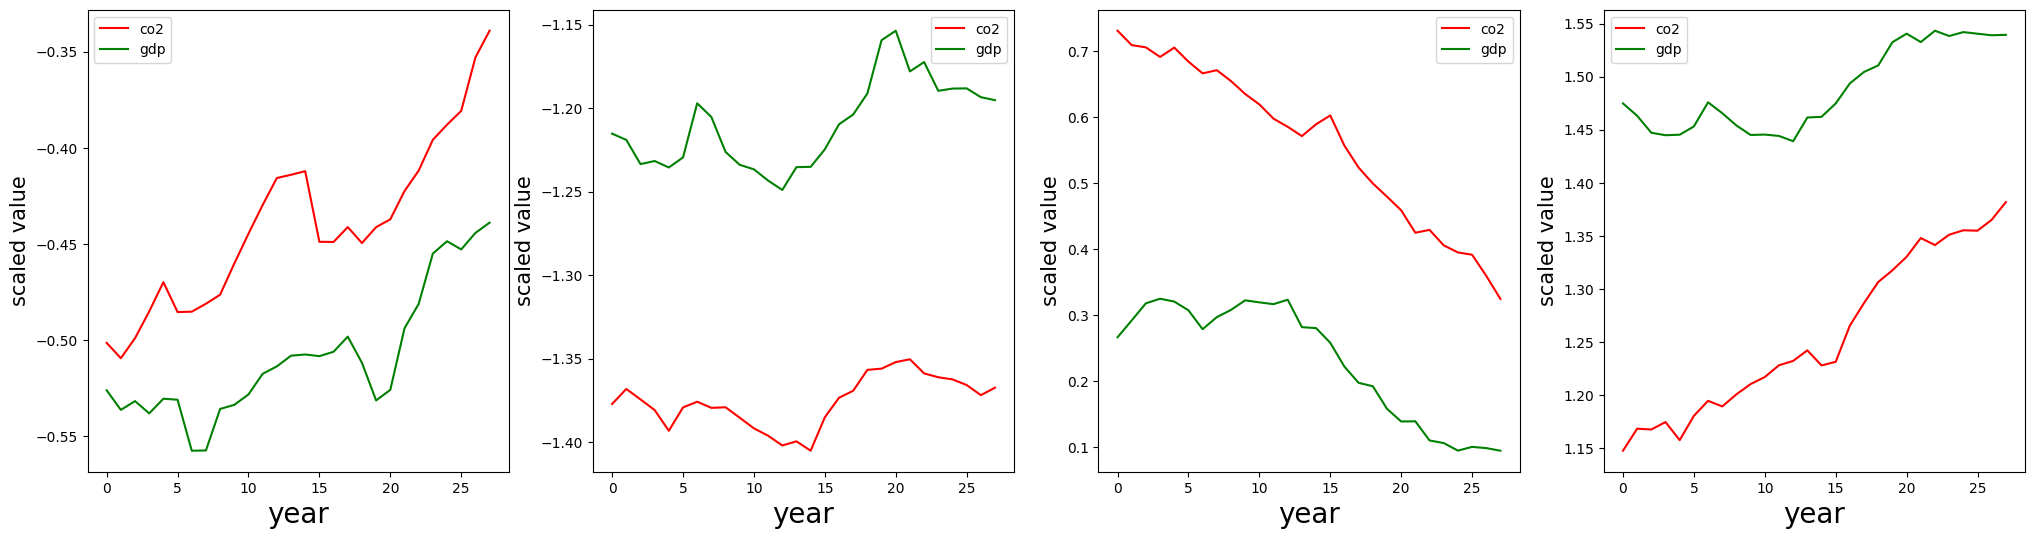

In [50]:
import matplotlib.pyplot as plt
# fig.set_size_inches(18.5, 30.5)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 6))
# fig.tight_layout()
# plt.xlabel('year')
# plt.ylabel('year')
# plt.tick_params( top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X")
# plt.ylabel("common Y")
for i in range(len(df_scaled_gdp)):
    
#     x = [str(i) for i in range(1994,2022,1)]
    axes[i].plot(df_scaled_gdp.iloc[i,:].values, color='r', label='co2')
    axes[i].plot(df_scaled_co2.iloc[i,:].values, color='g', label='gdp')

    axes[i].set_xlabel("year",fontsize=20)
    axes[i].set_ylabel("scaled value",fontsize=15)
    
    axes[i].legend()
#     plt.show()
# df_scaled_gdp.iloc[0,:].plot()

## Each group showing different relation of co2-gdp

In [51]:
covariate[covariate['cluster_label']==0].loc[:,'economy']

0     ARG
10    CHL
11    CHN
23    HRV
24    HUN
33    LTU
34    LVA
35    MDA
36    MEX
44    PRT
45    ROU
51    SWE
52    TUR
Name: economy, dtype: object

In [52]:
# df_scaled_gdp

In [53]:
# df_scaled_gdp.iloc[0,:]
# scaled_covariate = scaler.fit_transform(covariate.iloc[:,:-3])

In [54]:
# scaler.fit_transform()
# model2.predict(scaled_covariate[37])

In [55]:
# scaled_resp = scaler.fit_transform(response.iloc[:,1:29])

In [56]:
# scaled_resp[37] + res_list[1]

In [57]:
# res_list

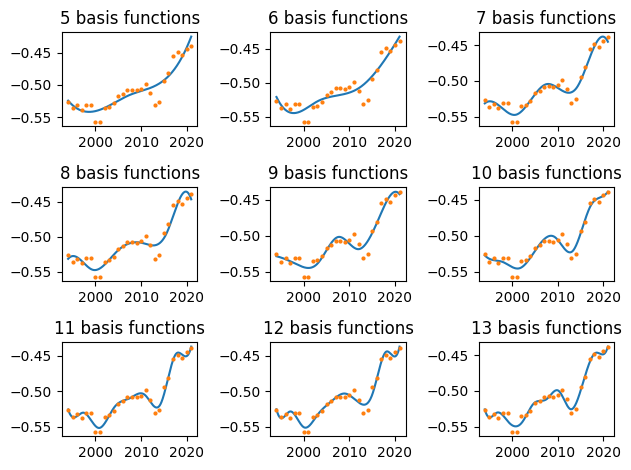

In [58]:
cluster1=pd.DataFrame()
cluster1['values']=df_scaled_co2.iloc[0,:].tolist()
cluster1['Years']=df_scaled_co2.columns
# cluster1

# data_matrix=CO2_list
X = skfda.FDataGrid(
    data_matrix=cluster1['values'].tolist(),
    grid_points=grid_points,
)

fig, axes = plt.subplots(nrows=3, ncols=3)
for n_basis in range(5, 14):
    basis = skfda.representation.basis.BSpline(n_basis=n_basis)
    X_basis = X.to_basis(basis)
    ax = axes.ravel()[n_basis - 5]
    #ax=axes
    fig = X_basis.plot(axes=ax)
    ax.plot(grid_points,df_scaled_co2.iloc[0,:].tolist(),'o',markersize=2)
    ax.set_title(f"{n_basis} basis functions")

fig.tight_layout()
plt.show()  

The Autocorrelation plot for the data is:
The Autocorrelation plot for the data is:
The Autocorrelation plot for the data is:
The Autocorrelation plot for the data is:


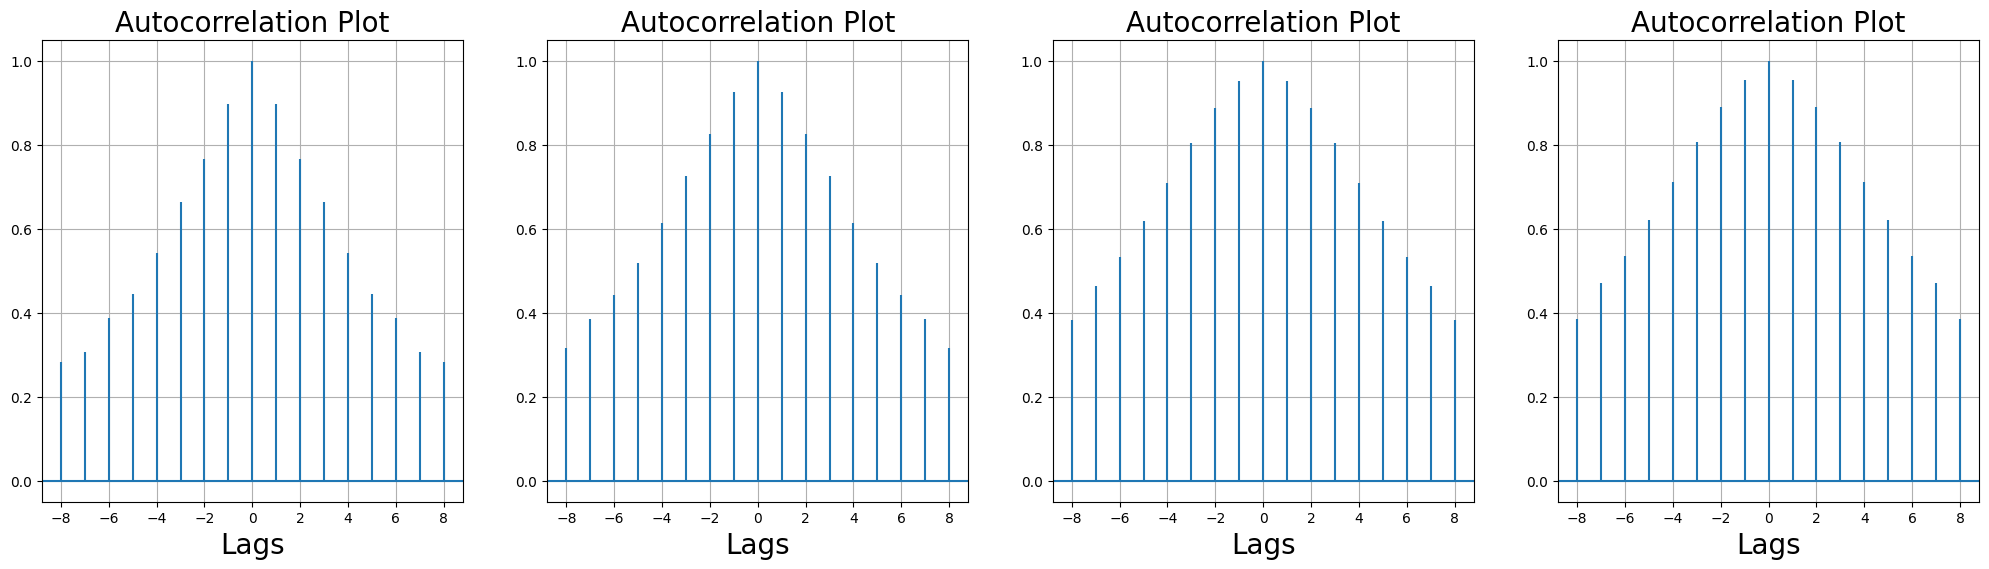

In [59]:
# calculate the "residual after fitting a curve to
# CO2 in USA
fig, ax = plt.subplots(1,4, figsize=(25,6))
n_basis=9

for i in range(len(df_scaled_co2)):
    cluster1=pd.DataFrame()
    cluster1['values']=df_scaled_co2.iloc[i,:].tolist()
    cluster1['Years']=df_scaled_co2.columns
    # cluster1

    # data_matrix=CO2_list
    X = skfda.FDataGrid(
        data_matrix=cluster1['values'].tolist(),
        grid_points=grid_points,
    )
    
    basis = skfda.representation.basis.BSpline(n_basis=n_basis)
    #evaluate the fucntion at the spesific time points 
    X_basis = X.to_basis(basis)
    diff = df_scaled_co2.iloc[i,:].tolist() - X_basis(grid_points)
    #diff
    x = np.reshape(diff,diff.size) 
    mean = np.mean(x)
    var = np.var(x)
    ndata = x - mean
    acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
    acorr = acorr / var / len(ndata)
#     print(len(acorr))
    # Adding plot title.
    ax[i].set_title("Autocorrelation Plot",fontsize=20)
    # Providing x-axis name.
    ax[i].set_xlabel("Lags",fontsize=20)
    # Plotting the Autocorrelation plot.
    ax[i].acorr(x, maxlags = 8)
    print("The Autocorrelation plot for the data is:")
    ax[i].grid(True)
#     plt.show()

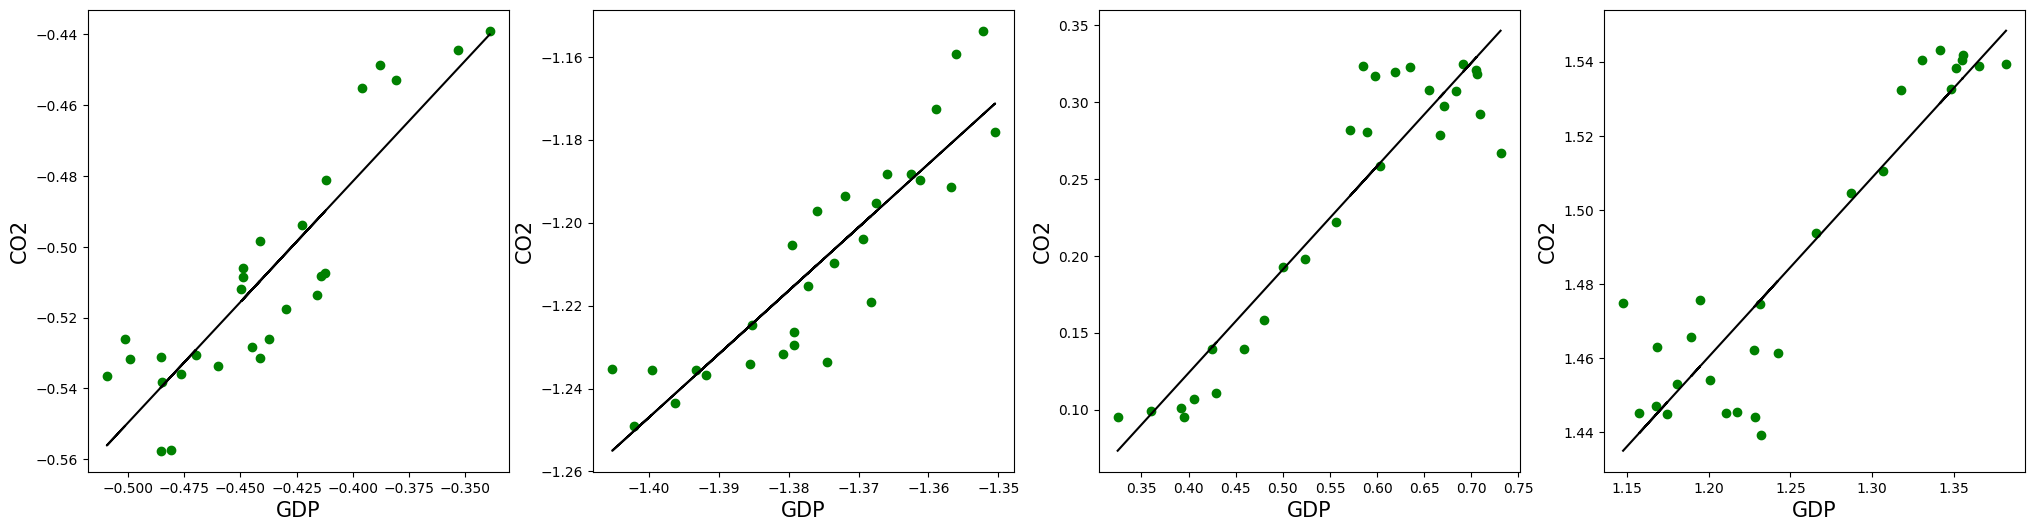

In [63]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

res_list = []
rmse = []

fig, ax = plt.subplots(1,4, figsize=(25,6))
for i in range(len(df_scaled_gdp)):
    x = df_scaled_gdp.iloc[i,:].values.reshape(-1,1)
    year = df_scaled_gdp.columns.tolist()
    
    temp_covariate = pd.DataFrame()
    temp_covariate['year'] = [i for i in range(len(year))]
    temp_covariate['x'] = x
    
    y = df_scaled_co2.iloc[i,:].values.reshape(-1,1)
    reg = LinearRegression()
    locals()["model"+str(i)] = reg.fit(x, y)
#     locals()["model"+str(i)] = locals()["model"+str(i)].fit()
    pred = locals()["model"+str(i)].predict(x)
    res = x - pred
    
    res_list.append(res)
    rms = mean_squared_error(y, locals()["model"+str(i)].predict(x), squared=False)
    rmse.append(rms)
    
    ax[i].scatter(x, y,color='g')
    ax[i].plot(x, locals()["model"+str(i)].predict(x),color='k')

    ax[i].set_xlabel('GDP',fontsize=15)
    ax[i].set_ylabel('CO2',fontsize=15)
    

In [64]:
rmse

[0.015177036896674937,
 0.011650309761313163,
 0.03220392142105294,
 0.015868508032055105]

In [66]:
for i in mse:
    print (np.sqrt(sum(i/len(mse))))

In [75]:
scaled_gdp_1 = pd.DataFrame(scaler.fit_transform(covariate.iloc[:,:-3].values))

In [68]:
response.drop('index',axis=1,inplace=True)

C:\Users\Upmanyu\AppData\Local\Temp\ipykernel_6320\1896485020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response.drop('index',axis=1,inplace=True)


In [79]:
scaled_co2_1 = pd.DataFrame(scaler.fit_transform(response.iloc[:,:-1].values))

In [80]:
res_list_1 = []

for i in range(len(scaled_gdp_1)):
    x = scaled_gdp_1.iloc[i,:].values.reshape(-1,1)

    y = scaled_co2_1.iloc[i,:].values.reshape(-1,1)
    reg = LinearRegression()
    locals()["modelA"+str(i)] = reg.fit(x, y)

    pred = locals()["modelA"+str(i)].predict(x)
    res = x - pred
    
    res_list_1.append(res)


In [81]:
residual_list = pd.DataFrame(np.concatenate(res_list_1,axis=1))

In [82]:
from sklearn.cluster import KMeans

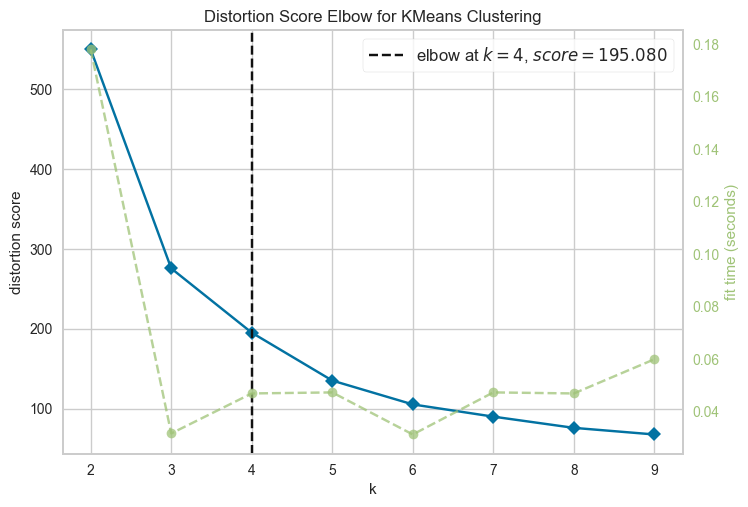

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(residual_list.T)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [84]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(residual_list.T)

In [85]:
scaled_co2_1['cluster'] = kmeans.labels_.tolist()

In [86]:
scaled_gdp_1['cluster'] = kmeans.labels_.tolist()

In [87]:
len(kmeans.labels_)

56

In [88]:
df_scaled_gdp_1 = scaled_gdp_1.groupby(['cluster']).mean()

In [89]:
df_scaled_co2_1 = scaled_co2_1.groupby(['cluster']).mean()

In [90]:
df_scaled_co2_1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.452591,-0.454708,-0.452604,-0.445233,-0.438966,-0.425894,-0.423123,-0.418750,-0.422723,-0.433368,...,-0.478105,-0.492180,-0.492074,-0.481893,-0.480581,-0.482638,-0.488106,-0.477295,-0.486669,-0.487512
1,1.819684,1.775091,1.676288,1.687692,1.755611,1.741693,1.725661,1.684684,1.723243,1.756082,...,2.127109,2.188339,2.164506,2.072448,2.078737,2.104870,2.118066,2.030691,2.074008,2.067142
2,0.273277,0.267955,0.329884,0.269267,0.287626,0.312460,0.271565,0.263933,0.249904,0.233832,...,-0.092699,-0.086263,-0.101670,-0.090006,-0.120456,-0.142222,-0.171488,-0.177843,-0.177584,-0.173134
3,-0.047795,-0.013052,-0.021005,0.008448,-0.061809,-0.111256,-0.072640,-0.054879,-0.052685,-0.027922,...,0.184490,0.182348,0.209073,0.221843,0.242635,0.253592,0.287415,0.312348,0.313198,0.315121


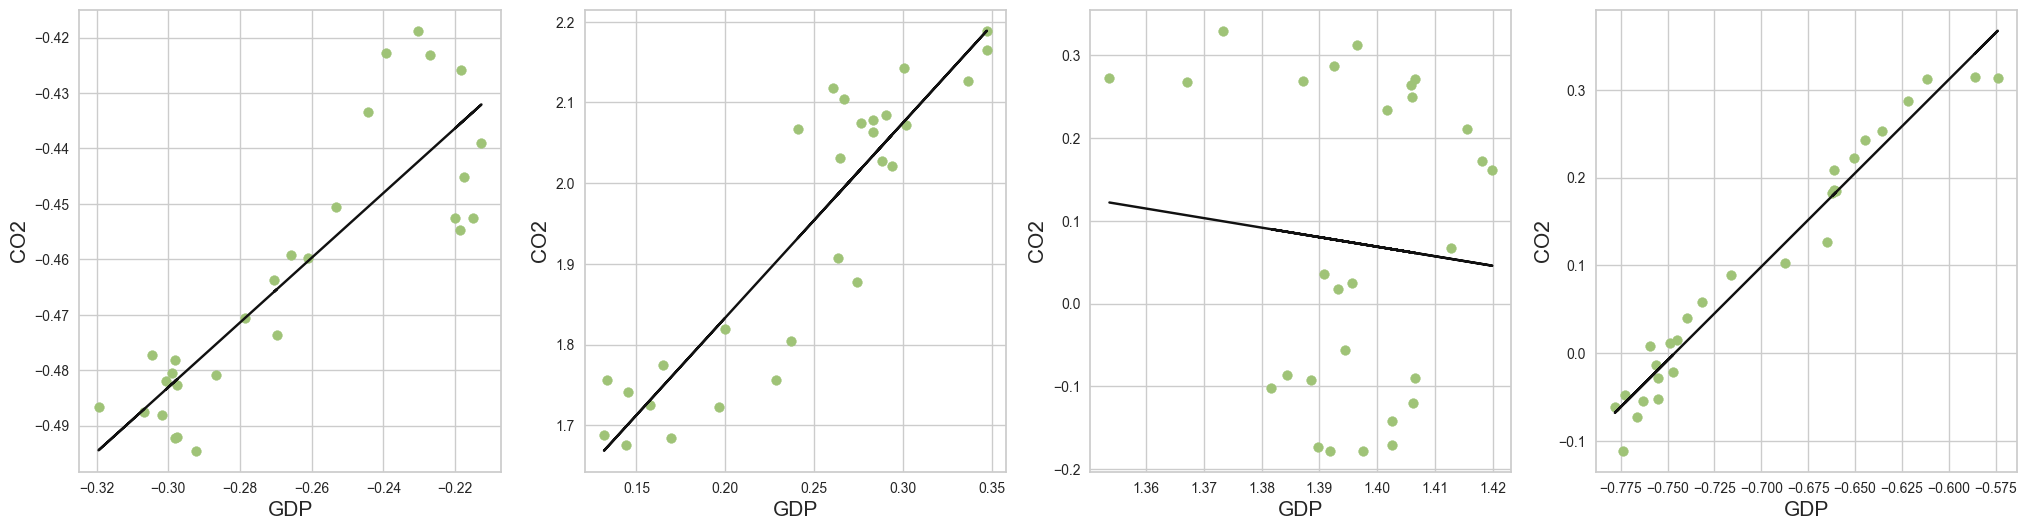

In [91]:

res_list = []
rmse = []

fig, ax = plt.subplots(1,4, figsize=(25,6))
for i in range(len(df_scaled_gdp_1)):
    x = df_scaled_gdp_1.iloc[i,:].values.reshape(-1,1)
    year = df_scaled_gdp_1.columns.tolist()
    
#     temp_covariate = pd.DataFrame()
#     temp_covariate['year'] = [i for i in range(len(year))]
#     temp_covariate['x'] = x
    
    y = df_scaled_co2_1.iloc[i,:].values.reshape(-1,1)
    reg = LinearRegression()
    locals()["model"+str(i)] = reg.fit(x, y)
#     locals()["model"+str(i)] = locals()["model"+str(i)].fit()
    pred = locals()["model"+str(i)].predict(x)
    res = x - pred
    
#     res_list.append(res)
    mse.append(res**2)
    rms = mean_squared_error(y, locals()["model"+str(i)].predict(x), squared=False)
    rmse.append(rms)
    
    ax[i].scatter(x, y,color='g')
    ax[i].plot(x, locals()["model"+str(i)].predict(x),color='k')

    ax[i].set_xlabel('GDP',fontsize=15)
    ax[i].set_ylabel('CO2',fontsize=15)

In [92]:
for i in mse:
    print (np.sqrt(sum(i/len(mse))))

[0.52334909]
[4.49221084]
[3.49912393]
[2.11760119]


In [93]:
rmse

[0.011642154161769598,
 0.07388387304375733,
 0.18037251039202853,
 0.026155881556656758]

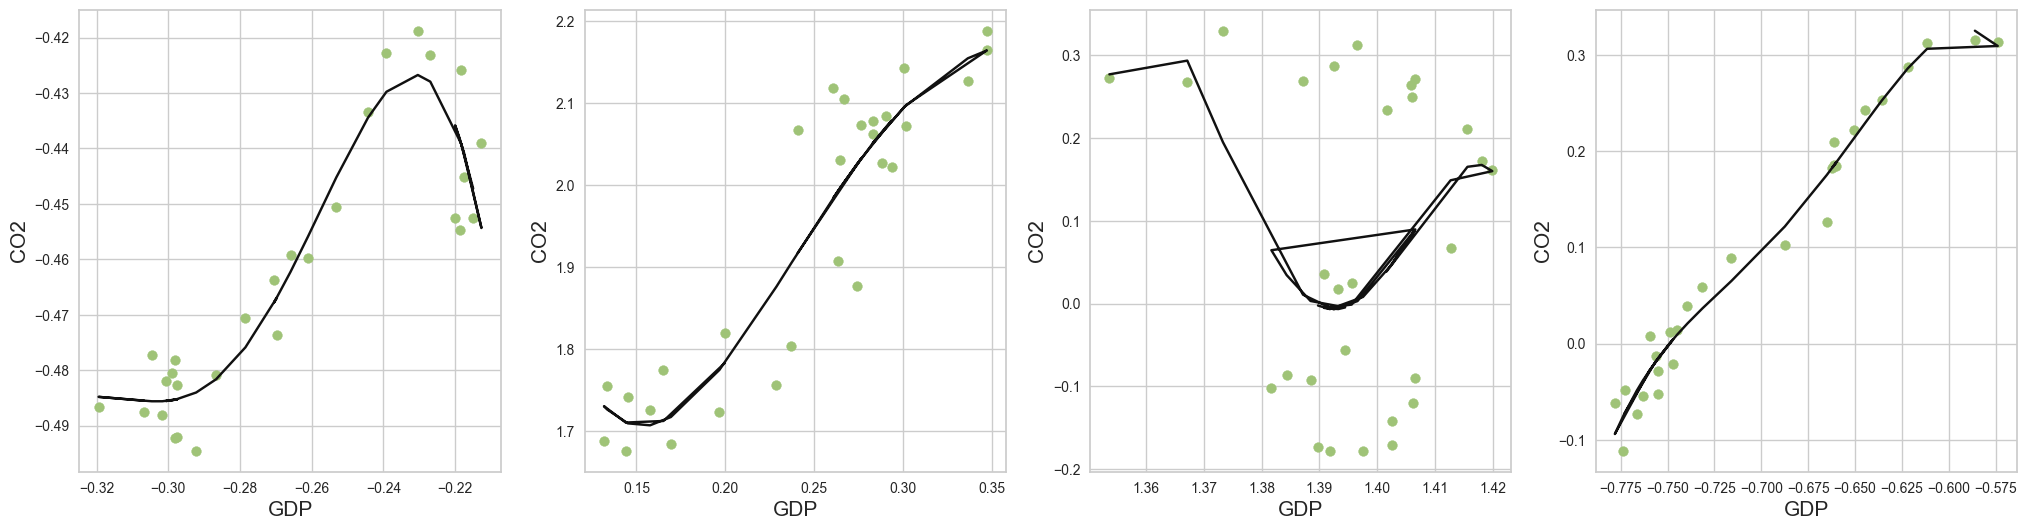

In [94]:
from sklearn.preprocessing import PolynomialFeatures

res_list = []
mse = []

fig, ax = plt.subplots(1,4, figsize=(25,6))
for i in range(len(df_scaled_gdp_1)):
    x = df_scaled_gdp_1.iloc[i,:].values.reshape(-1,1)
#     year = df_scaled_gdp_1.columns.tolist()
    
#     temp_covariate = pd.DataFrame()
#     temp_covariate['year'] = [i for i in range(len(year))]
#     temp_covariate['x'] = x
    poly = PolynomialFeatures(degree = 4)
    X_poly = poly.fit_transform(x)
    
    y = df_scaled_co2_1.iloc[i,:].values.reshape(-1,1)
    poly.fit(X_poly, y)
#     lin2 = LinearRegression()
#     lin2.fit(X_poly, y)
    reg = LinearRegression()
    locals()["model"+str(i)] = reg.fit(X_poly, y)
#     locals()["model"+str(i)] = locals()["model"+str(i)].fit()
    pred = locals()["model"+str(i)].predict(X_poly)
    res = X_poly - pred
    
#     res_list.append(res)
    mse.append(res**2)
    rms = mean_squared_error(y, locals()["model"+str(i)].predict(X_poly), squared=False)
    rmse.append(rms)
    
    
    ax[i].scatter(x, y,color='g')
    ax[i].plot(x, locals()["model"+str(i)].predict(X_poly),color='k')

    ax[i].set_xlabel('GDP',fontsize=15)
    ax[i].set_ylabel('CO2',fontsize=15)

In [95]:
rmse

[0.011642154161769598,
 0.07388387304375733,
 0.18037251039202853,
 0.026155881556656758,
 0.00774064302003465,
 0.06857983595184125,
 0.160103896614577,
 0.02124668934220146]

In [96]:
y.shape

(28, 1)

In [97]:
for i in mse:
    print (np.sqrt(sum(i/len(mse))))

[3.87153187 0.52385458 1.41934046 1.17385002 1.24156267]
[2.52044788 4.49279953 4.97411977 5.09961983 5.13410517]
[2.46119756 3.50601985 4.96751664 7.01085244 9.86730315]
[2.41671451 2.11798578 1.20260194 1.19328239 0.70248269]
